<a href="https://colab.research.google.com/github/farheenfathimaa/TensorFlow-DeepLearning/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow
In this notebook we're going to learn how to write neural networks for classification problems.

A **classification** is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Mutliclass classification
* Multilabel classification

See full course materials on GitHub: [link](https://github.com/mrdbourke/tensorflow-deep-learning/)



## Creating data to view and fit

In [8]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [9]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [10]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... let's visualize it!

In [11]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [12]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

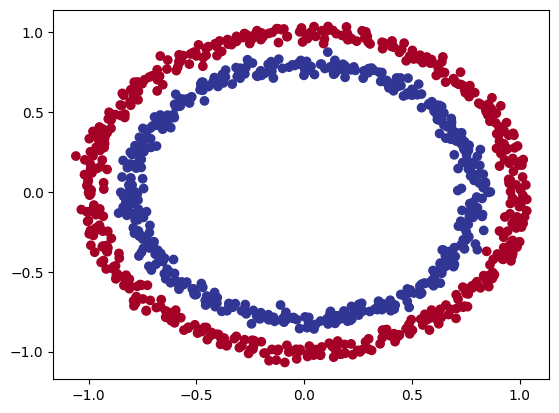

In [13]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

🛠 Exercise: Before pushing forward, spend 10-minutes playing around with [playground.tensorflow.org](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.36999&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=fals) building and running different neural networks. See what happens when you change different hyperparameters.


## Input and output shapes

In [14]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [15]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [16]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling
The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...
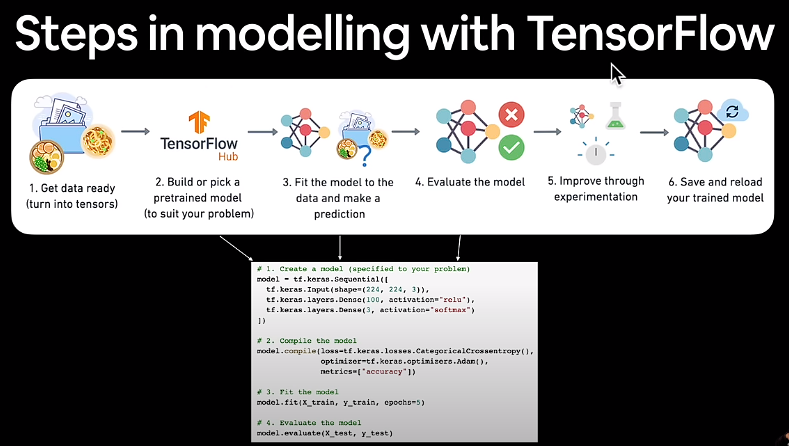

In [17]:
# Import tensorflow
import tensorflow as tf
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 6.4905 - accuracy: 0.4980
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 6.3771 - accuracy: 0.4900
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 6.2401 - accuracy: 0.4820
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 6.2540 - accuracy: 0.4900
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 6.0743 - accuracy: 0.4880


In [18]:
# Let's try and improve our model by training it for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [19]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [20]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.7021 - accuracy: 0.4950


[0.7021257281303406, 0.4950000047683716]

## Improving our model
Let's look into our bag of tricks to see how we can improve our model.

1. **Create a model** - we might to add more layers or increase the number of hidden units within a layer.
2. **Compiling a model** - here we might to choose a different optimization function such as Adam instead of SGD.
3. **Fitting a model** - perhaps we might fit our model for more epochs (leave it training for longer).

In [21]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model(3 layers this time)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # added 100 dense neurons
    tf.keras.layers.Dense(10), # added another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [22]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.5050


[0.6967830657958984, 0.5049999952316284]

**🔑 Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [23]:
import numpy as np

In [24]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
   1. https://cs231n.github.io/neural-networks-case-study/
   2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classification


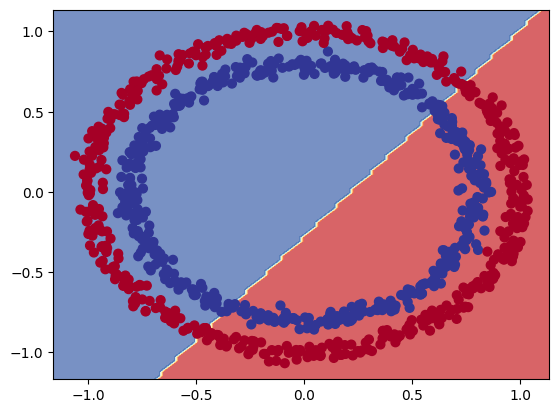

In [25]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [26]:
# Let's see if our model can be used for a regression problem...
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our rmodel to the regression data
#model_3.fit(X_reg_train, y_reg_train, epochs=100)

Oh wait... we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [27]:
# Enable NumPy behavior for TensorFlow tensors
tf.experimental.numpy.experimental_enable_numpy_behavior()

# Now you can use NumPy-like methods on tensors
X_reg_train = X_reg_train.reshape(-1, 1)
X_reg_test = X_reg_test.reshape(-1, 1)
y_reg_train = y_reg_train.reshape(-1, 1)
y_reg_test = y_reg_test.reshape(-1, 1)

In [28]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 360.4225 - mae: 360.4225
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 249.2421 - mae: 249.2421
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 140.6644 - mae: 140.6644
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 49.8081 - mae: 49.8081
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 78.3937 - mae: 78.3937
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 77.7543 - mae: 77.7543
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 48.5344 - mae: 48.5344
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 51.9426 - mae: 51.9426
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 47.2311 - mae: 47.2311
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 44.8102 - mae: 44.8102
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 5ms/step


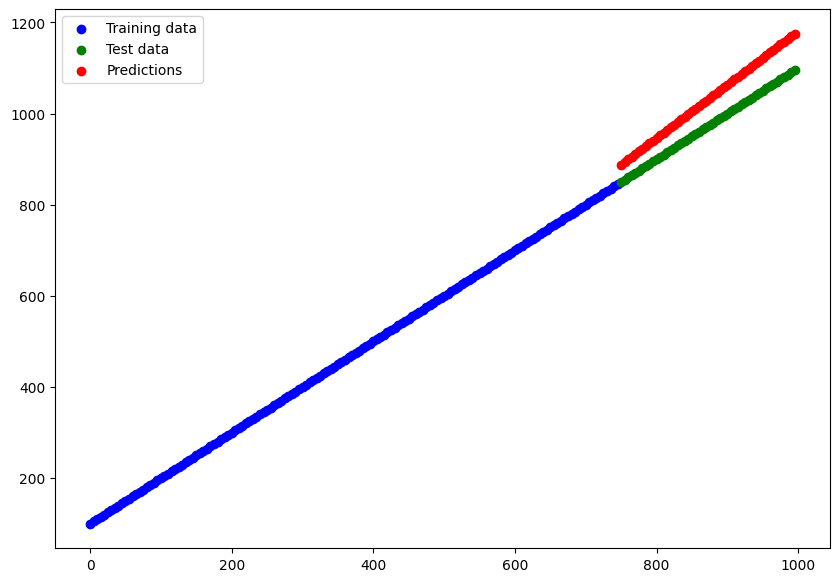

In [29]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity
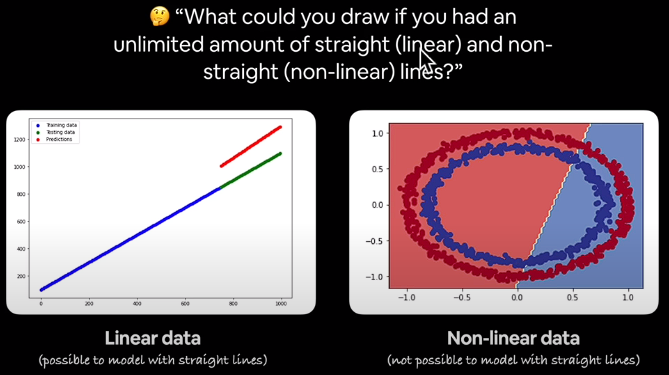

In [30]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.1329 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 6.0957 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 6.0712 - accuracy: 0.4880
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 6.0698 - accuracy: 0.4870
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0669 - accuracy: 0.4870
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0646 - accuracy: 0.4880
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0634 - accuracy: 0.4880
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0621 - accuracy: 0.4880
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0609 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0596 - accuracy: 0.4880
Epoch 11/

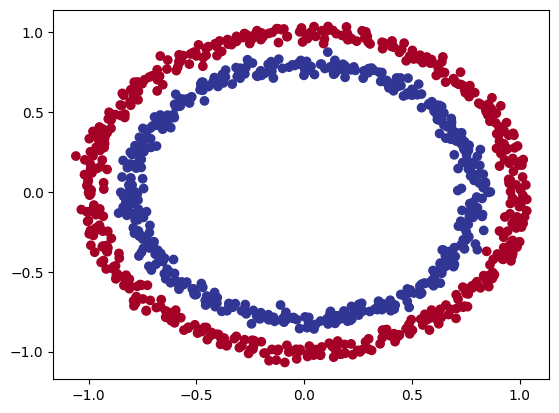

In [31]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classification


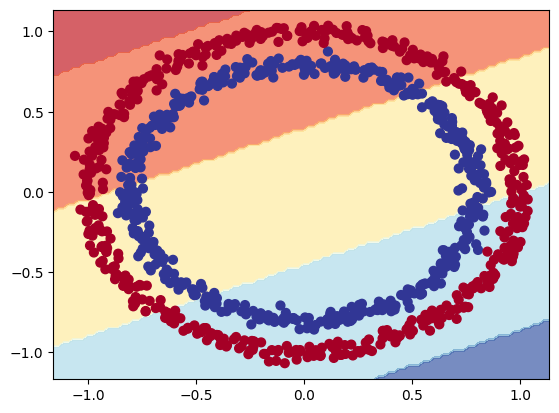

In [32]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try build our first neural network with a non-linear activation function.

In [33]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.5768 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5577 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 5.5222 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4714 - accuracy: 0.4810
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4659 - accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4643 - accuracy: 0.4800
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4630 - accuracy: 0.4800
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4238 - accuracy: 0.4790
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3624 - accuracy: 0.4760
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3117 - accuracy: 0.4740
Epoch 11/

In [34]:
# Time to replicate the multi-layer neural network from TensorFlow playground in code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 1.1092 - accuracy: 0.4860
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9322 - accuracy: 0.3790
Epoch 3/250
32/32 [==============================] - 0s 9ms/step - loss: 0.8783 - accuracy: 0.3580
Epoch 4/250
32/32 [==============================] - 0s 8ms/step - loss: 0.8503 - accuracy: 0.3370
Epoch 5/250
32/32 [==============================] - 0s 5ms/step - loss: 0.8298 - accuracy: 0.3030
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8130 - accuracy: 0.2690
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7992 - accuracy: 0.2720
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7892 - accuracy: 0.2610
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7795 - accuracy: 0.2650
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7717 - accuracy: 0.2610
Epoch 11/

In [35]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0564 - accuracy: 0.9870


[0.056352343410253525, 0.9869999885559082]

313/313 [==============================] - 0s 1ms/step
doing binary classification


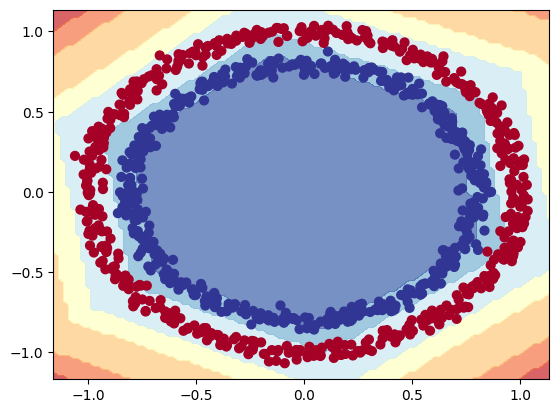

In [36]:
# How do our model predictions look?
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

In [37]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. fit the model
history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.5060
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5090
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5110
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5190
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5280
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5280
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.5360
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5370
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.5460
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5400
Epoch 11/

In [38]:
# 4. Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0586 - accuracy: 0.9960


[0.05863633379340172, 0.9959999918937683]

313/313 [==============================] - 0s 1ms/step
doing binary classification


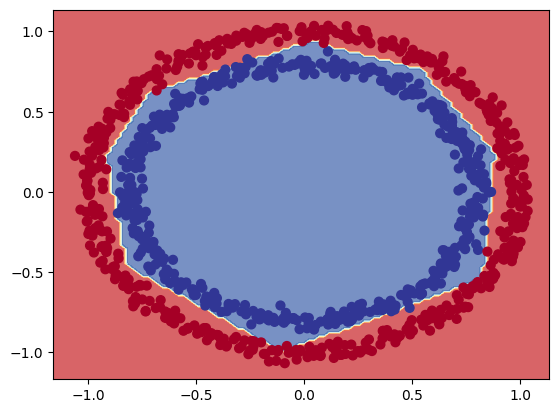

In [39]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

**🤔 Question:** What's wrong the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predict on?

**🔑 Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [40]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

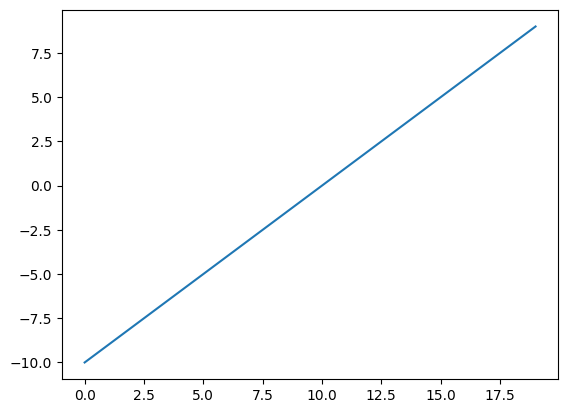

In [41]:
# Visualize our toy tensor
plt.plot(A);

In [42]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

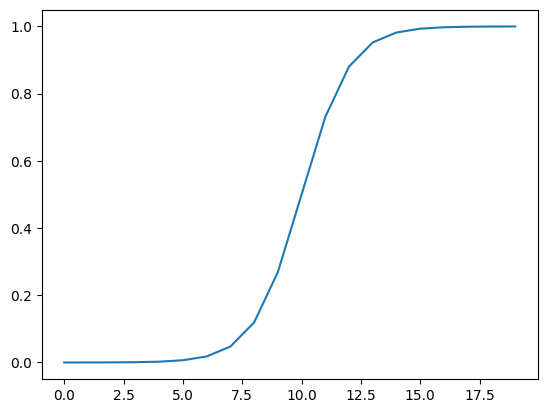

In [43]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [44]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

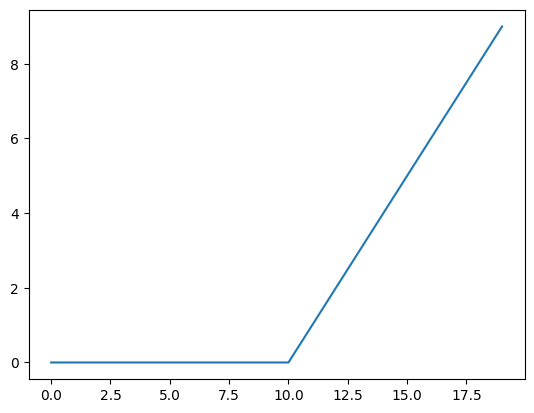

In [45]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [46]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

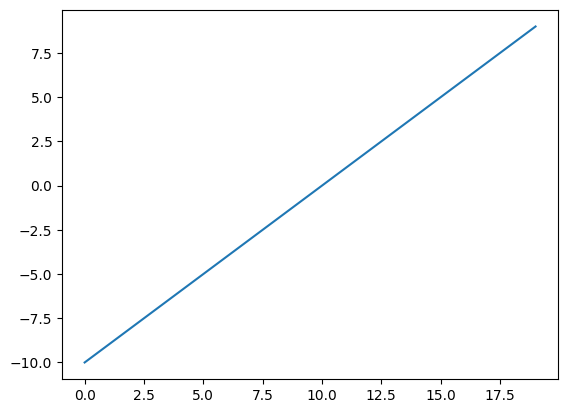

In [47]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A));

In [48]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

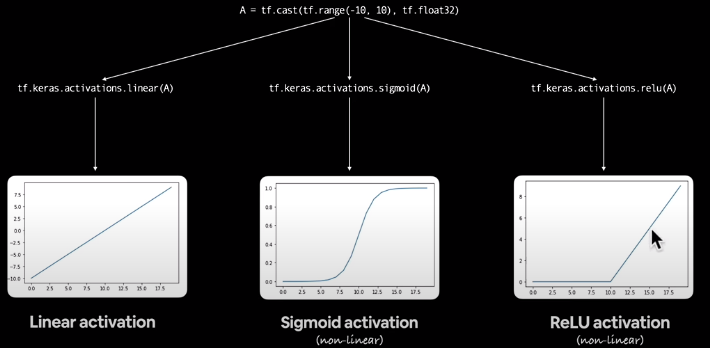

## Evaluating and improving our classification model
So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [49]:
# Check how many examples we have
len(X)

1000

In [50]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [51]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

# 3. fit the model
history = model_8.fit(X_train, y_train, epochs=250)

Epoch 1/250
25/25 [==============================] - 1s 2ms/step - loss: 0.6961 - accuracy: 0.5150
Epoch 2/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5200
Epoch 3/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5312
Epoch 4/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5325
Epoch 5/250
25/25 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5475
Epoch 6/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5537
Epoch 7/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5487
Epoch 8/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.5562
Epoch 9/250
25/25 [==============================] - 0s 3ms/step - loss: 0.6842 - accuracy: 0.5450
Epoch 10/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5663
Epoch 11/

In [52]:
 # 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9700


[0.13742271065711975, 0.9700000286102295]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


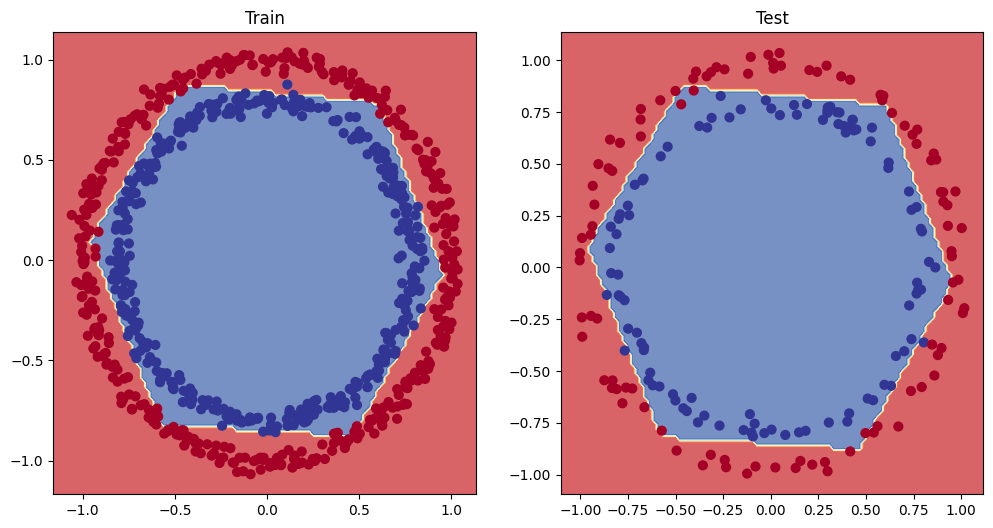

In [53]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

## Plot the loss (or training) curves

In [54]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.696056,0.51500
1,0.693543,0.52000
2,0.691579,0.53125
3,0.690357,0.53250
4,0.688511,0.54750
...,...,...
245,0.117971,0.97375
246,0.116628,0.97875
247,0.115810,0.97875
248,0.115964,0.97625


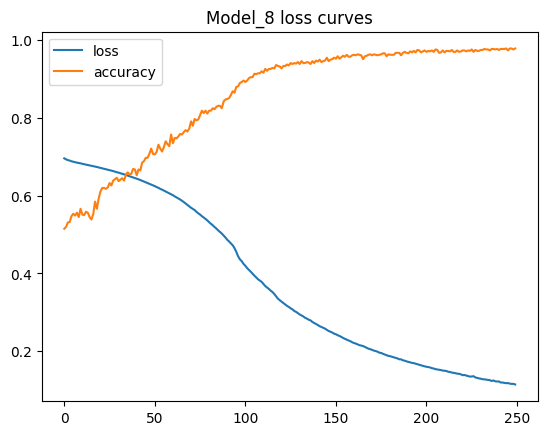

In [55]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

**🔑 Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate
To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [56]:
# Set random seed
tf.random.set_seed(42)

# Create the model(same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_9 = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.6925 - accuracy: 0.5038 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5063 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.5100 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.5063 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5038 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6905 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6901 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

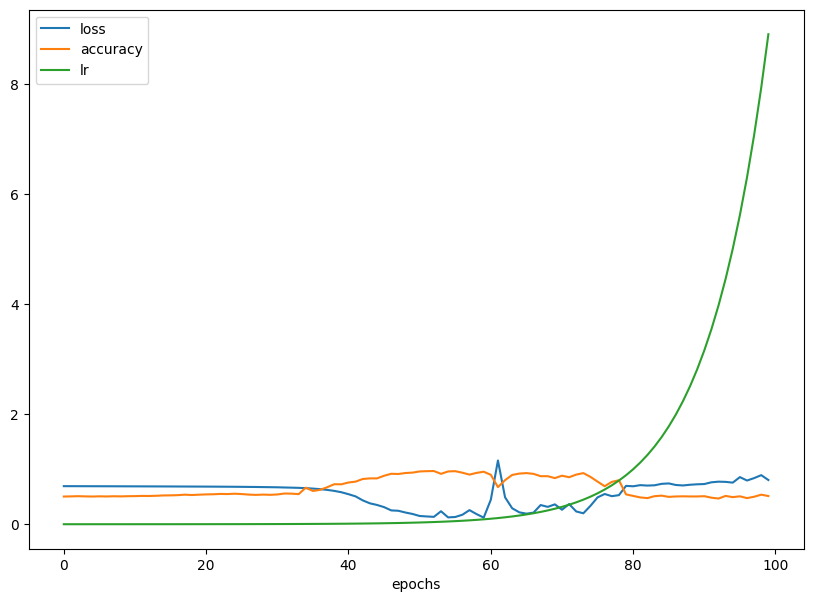

In [57]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

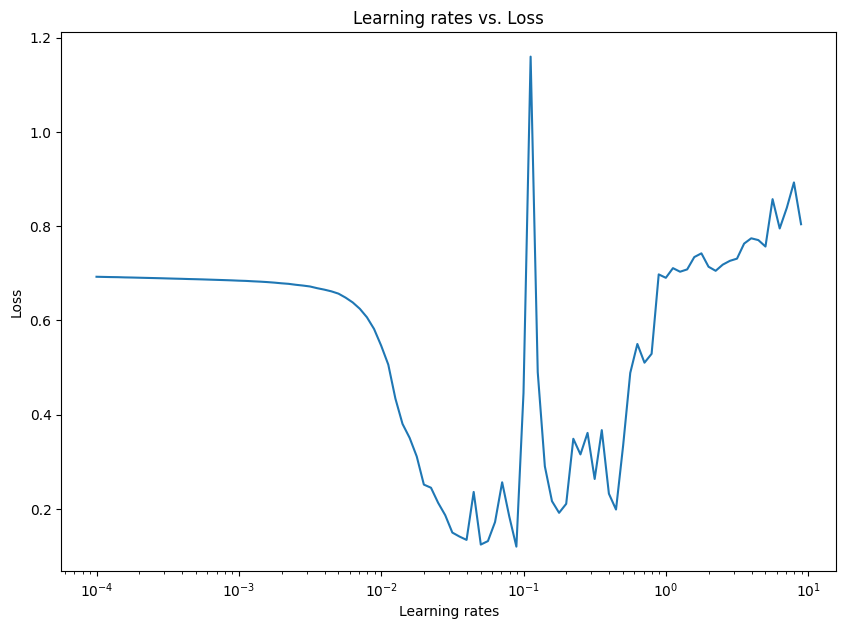

In [58]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rates")
plt.ylabel("Loss")
plt.title("Learning rates vs. Loss");

In [59]:
len(lrs)

100

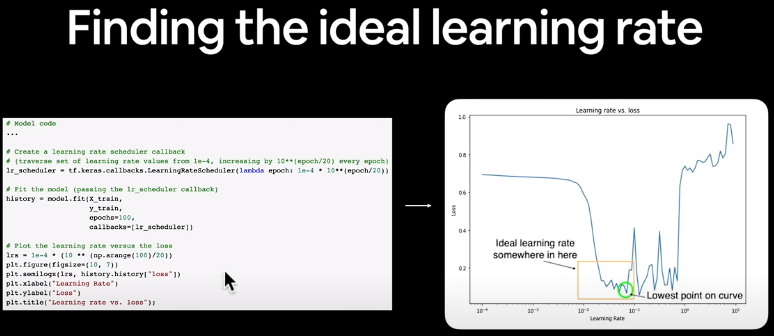

In [60]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [61]:
# Learning rate we used before (model_8)
10**-2

0.01

In [62]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=150)

Epoch 1/150
25/25 [==============================] - 1s 3ms/step - loss: 0.6935 - accuracy: 0.4863
Epoch 2/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4812
Epoch 3/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5063
Epoch 4/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5050
Epoch 5/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5038
Epoch 6/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5263
Epoch 7/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5312
Epoch 8/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.5325
Epoch 9/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5238
Epoch 10/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5362
Epoch 11/

In [63]:
# Evaluate model_10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2729 - accuracy: 0.9550


[0.27294984459877014, 0.9549999833106995]

In [64]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9700


[0.13742271065711975, 0.9700000286102295]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


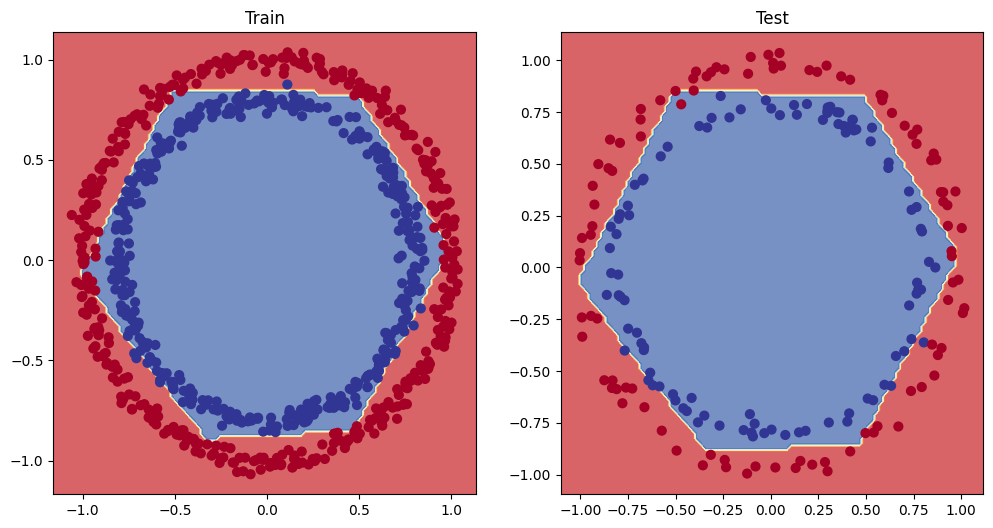

In [65]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show();

## More classification evaluation methods
Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn) - [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

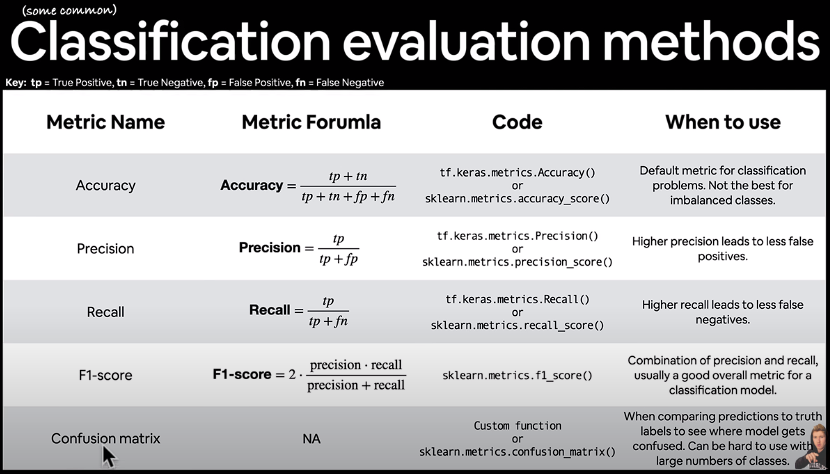

In [66]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.2729 - accuracy: 0.9550
Model loss on the test set: 0.27294984459877014
Model accuracy on the test set: 95.50%


How about a confusion matrix?
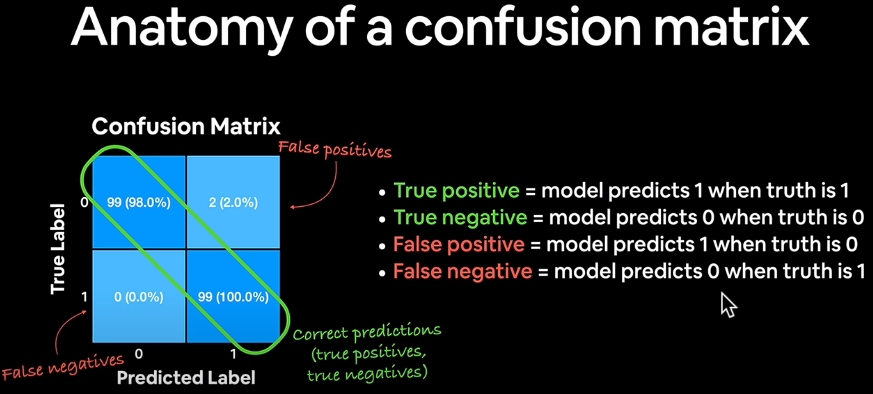

In [112]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 4ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [68]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [69]:
y_preds[:10]

array([[0.82272255],
       [0.1545256 ],
       [0.7959194 ],
       [0.1580719 ],
       [0.82272255],
       [0.48084122],
       [0.08187026],
       [0.21153052],
       [0.7311636 ],
       [0.12879337]], dtype=float32)

Oops... looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [70]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [71]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[96,  4],
       [ 5, 95]])

How about we prettify our confusion matrix?

In [72]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html?highlight=plot%20confusion%20matrix#sklearn.metrics.plot_confusion_matrix

import itertools
def make_confusion_matrix(y_true, y_preds, classes=False, figsize=(10, 10), text_size=15):
  """
  Plots confusion matrix in a beautiful manner
  """
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_preds)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

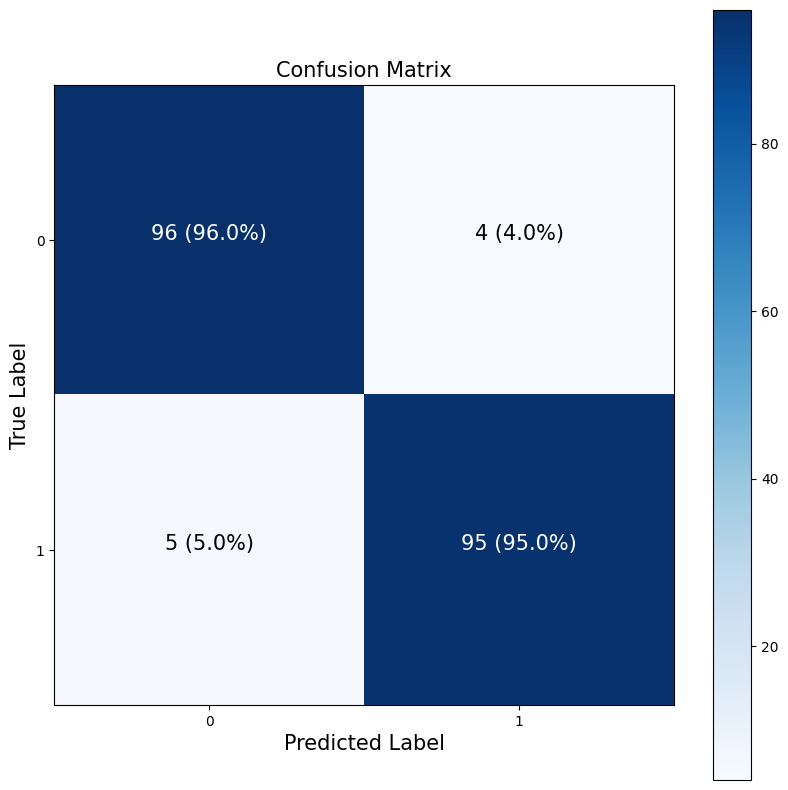

In [73]:
make_confusion_matrix(y_test, y_preds=tf.round(y_preds))

# Working with a larger example (multiclass classification)
When you have more than two classes as an option, it's known as **multi-class classification**.

* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice mutli-class classification, we're going to build a neural network to classify images of different items of clothing.



## Preparing the data

In [74]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [75]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [76]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

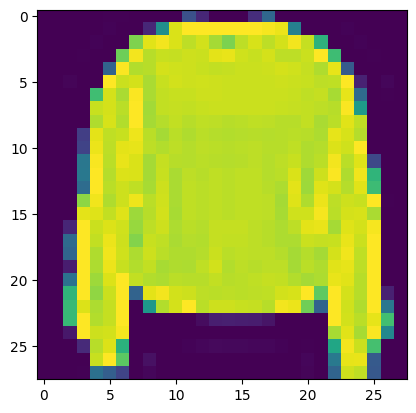

In [77]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [78]:
# Check out samples label
train_labels[7]

2

In [79]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Coat')

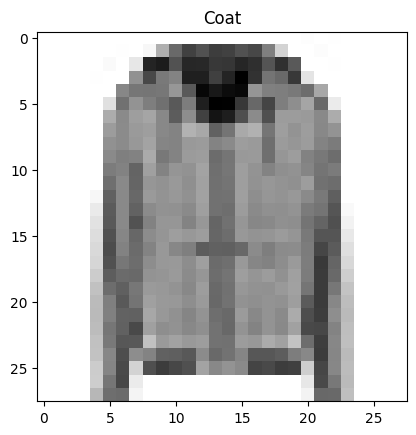

In [80]:
# Plot an example image and it's label
index_of_choice = 28
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

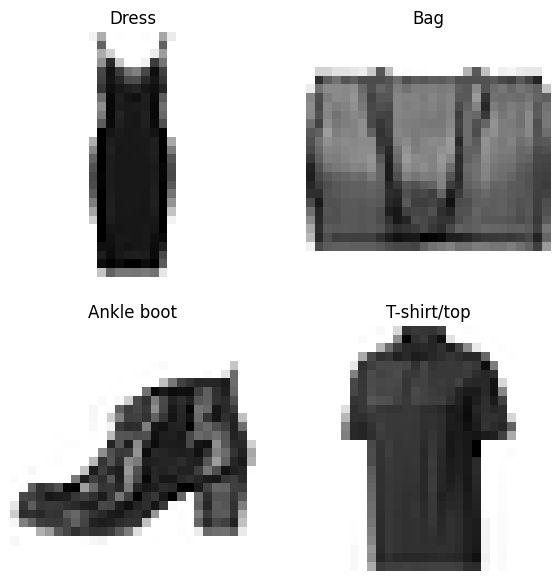

In [81]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model
For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:

* **Input shape** = 28 x 28 (the shape of one image)
* **Output shape** = 10 (one per class of clothing)
* **Loss function** = `tf.keras.losses.CategoricalCrossentropy()`
  * If your labels are one-hot encoded, use `CategoricalCrossentropy()`
  * If your labels are integer form use `SparseCategoricalCrossentropy()`
* **Output layer activation** = `Softmax` (not sigmoid)

In [82]:
# our data needs to be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [83]:
28 * 28

784

In [84]:
# this is with integers so we are using SparseCategoricalentropy()
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.01),
                 metrics="accuracy")

# fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1907 - accuracy: 0.1715 - val_loss: 1.7835 - val_accuracy: 0.2635
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7193 - accuracy: 0.2627 - val_loss: 1.6795 - val_accuracy: 0.2760
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6539 - accuracy: 0.2767 - val_loss: 1.6328 - val_accuracy: 0.2777
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6246 - accuracy: 0.2828 - val_loss: 1.6217 - val_accuracy: 0.2963
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6098 - accuracy: 0.2891 - val_loss: 1.6026 - val_accuracy: 0.2953
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5979 - accuracy: 0.2964 - val_loss: 1.5946 - val_accuracy: 0.2905
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5897 - accuracy: 0.3097 - val_loss: 1.5859 - val_accuracy:

In [85]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [86]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics="accuracy")

# fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3336 - accuracy: 0.0970 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [87]:
# Check the model summary
model_11.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 4)                 3140      
                                                                 
 dense_30 (Dense)            (None, 4)                 20        
                                                                 
 dense_31 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

## Normalizing our data
Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [89]:
# We can get our traing and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [90]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                            tf.one_hot(train_labels, depth=10),
                            epochs=10,
                            validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2443 - accuracy: 0.5139 - val_loss: 0.8493 - val_accuracy: 0.6705
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7355 - accuracy: 0.7289 - val_loss: 0.7086 - val_accuracy: 0.7474
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6411 - accuracy: 0.7613 - val_loss: 0.6636 - val_accuracy: 0.7442
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6057 - accuracy: 0.7729 - val_loss: 0.6244 - val_accuracy: 0.7705
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5871 - accuracy: 0.7796 - val_loss: 0.6181 - val_accuracy: 0.7767
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5716 - accuracy: 0.7889 - val_loss: 0.6087 - val_accuracy: 0.7795
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5635 - accuracy: 0.7916 - val_loss: 0.6076 - val_accuracy:

> **🔑 Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

<Axes: title={'center': 'Normalized data'}>

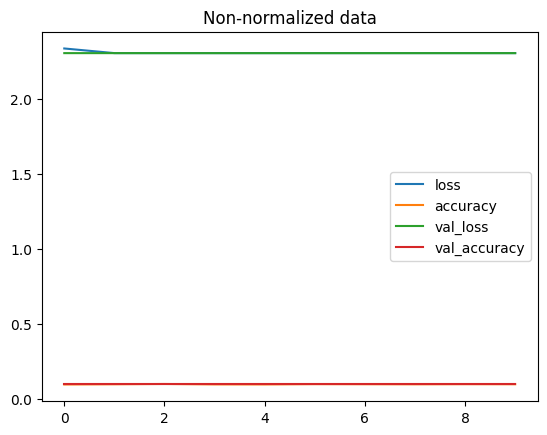

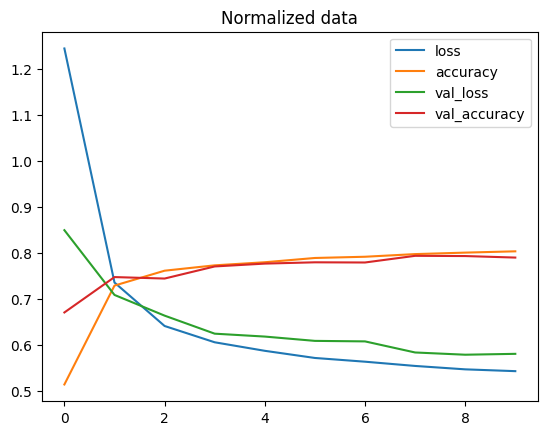

In [91]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

> **🔑 Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [92]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3645 - accuracy: 0.4767 - val_loss: 1.0711 - val_accuracy: 0.5957 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9528 - accuracy: 0.6222 - val_loss: 0.9091 - val_accuracy: 0.6297 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8714 - accuracy: 0.6382 - val_loss: 0.8739 - val_accuracy: 0.6509 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8313 - accuracy: 0.6652 - val_loss: 0.8221 - val_accuracy: 0.6707 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7754 - accuracy: 0.7219 - val_loss: 0.7610 - val_accuracy: 0.7451 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7039 - accuracy: 0.7593 - val_loss: 0.7544 - val_accuracy: 0.7389 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

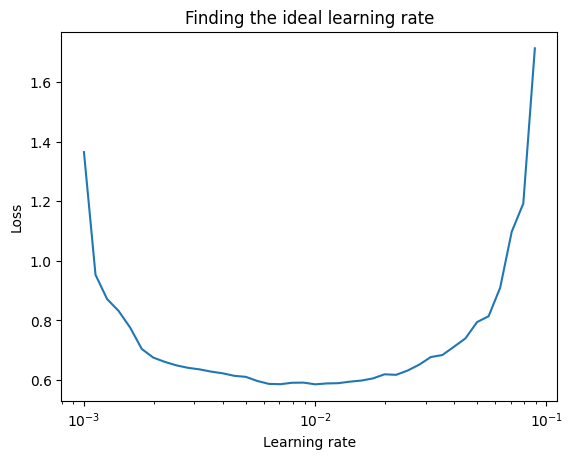

In [93]:
# Plot th learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 **(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [94]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# fit model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.6327 - accuracy: 0.3701 - val_loss: 1.3518 - val_accuracy: 0.4449
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2621 - accuracy: 0.4658 - val_loss: 1.2248 - val_accuracy: 0.4819
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1637 - accuracy: 0.5072 - val_loss: 1.1502 - val_accuracy: 0.5148
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0982 - accuracy: 0.5357 - val_loss: 1.0851 - val_accuracy: 0.5336
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0539 - accuracy: 0.5492 - val_loss: 1.0533 - val_accuracy: 0.5473
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0113 - accuracy: 0.5664 - val_loss: 1.0280 - val_accuracy: 0.5552
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9863 - accuracy: 0.5752 - val_loss: 1.0002 - val_accuracy:

## Evaluating our multi-class classification model
To evlauate our multi-class classification model we could:

* Evalaute its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecutre)
* Save and export it for use in an application

Let's go through the top 2...

In [95]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [96]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for prediction probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.5762990e-04, 1.8393270e-07, 1.6833844e-03, 1.6822738e-05,
        2.8364474e-04, 8.2818322e-02, 4.0636612e-03, 5.6890082e-01,
        7.5767981e-04, 3.4121779e-01],
       [1.0566013e-02, 1.0539787e-04, 2.6803330e-01, 2.8042991e-03,
        6.7321010e-02, 7.4361041e-02, 2.7418965e-01, 5.1940735e-02,
        3.3623104e-03, 2.4731624e-01],
       [9.4322529e-11, 9.9786603e-01, 2.0045120e-05, 4.1326779e-04,
        1.7005730e-03, 4.2848846e-37, 1.7595388e-08, 0.0000000e+00,
        5.7614298e-24, 0.0000000e+00],
       [1.7518369e-11, 9.9900264e-01, 6.4500541e-06, 2.1097194e-04,
        7.7980902e-04, 0.0000000e+00, 3.6846277e-09, 0.0000000e+00,
        1.8019123e-25, 0.0000000e+00],
       [1.0973371e-01, 3.7729507e-04, 1.7910001e-01, 3.6736257e-02,
        7.6122247e-02, 2.7756946e-04, 5.9061533e-01, 1.7577610e-08,
        7.0375525e-03, 5.0101627e-13]], dtype=float32)

> **🔑 Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [97]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([2.5762990e-04, 1.8393270e-07, 1.6833844e-03, 1.6822738e-05,
        2.8364474e-04, 8.2818322e-02, 4.0636612e-03, 5.6890082e-01,
        7.5767981e-04, 3.4121779e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=7>,
 'Sneaker')

In [98]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([7, 6, 1, 1, 6, 1, 2, 6, 5, 7])

In [99]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred= y_preds)

array([[685,   0,  10, 102,  11,   6, 169,   0,  17,   0],
       [  1, 924,   9,  26,  31,   0,   9,   0,   0,   0],
       [ 15,   6, 588,   8, 259,   6, 107,   0,   2,   9],
       [ 44,  17,  10, 775,  35,   2, 112,   0,   5,   0],
       [  4,  14, 354,  28, 540,   1,  55,   0,   2,   2],
       [  0,   0,   0,   0,   0, 822,  10, 127,   2,  39],
       [162,   0, 281,  71,  64,  15, 389,   0,  15,   3],
       [  0,   0,   0,   0,   0,  97,   0, 771,   1, 131],
       [ 28,   0,   2,   5,   2,  69,  38,   3, 850,   3],
       [  0,   0,   1,   0,   0,   1,   2,  53,   0, 943]])

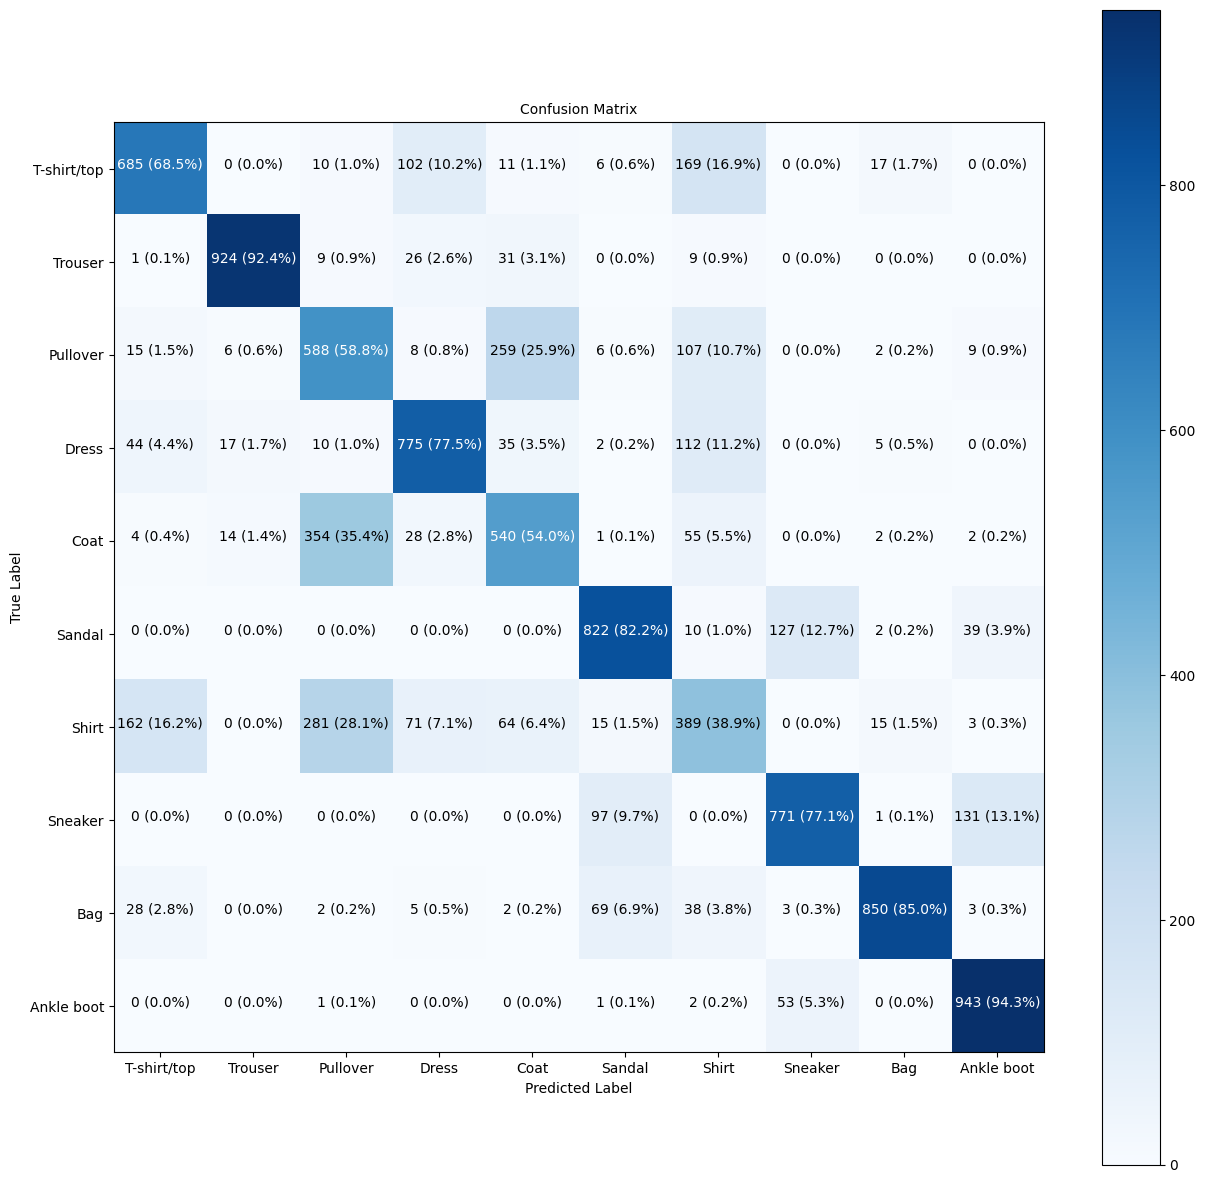

In [101]:
# Let's reuse the function we made for ploting confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_preds=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

> **🔑 Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:

* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [102]:
import random
def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and true label.
  """
  # Set up random integer
  i = random.randint(0,len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label ==  true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  #plt.xlabel("Pred: {} {:.2.0f}% (True: {})".format(pred_label,
            #                                         100* tf.reduce_max(pred_probs),
            #                                         true_label),
            #  color=color) # Set the color to green or red based on if prediction is right or wrong

  # Add xlabel information (prediction/true label)
  # Convert tensor to a numpy array for formatting
  pred_prob = tf.reduce_max(pred_probs).numpy()
  plt.xlabel(f"Pred: {pred_label} {pred_prob * 100:.2f}% (True: {true_label})", color=color)

1/1 [==============================] - 0s 31ms/step


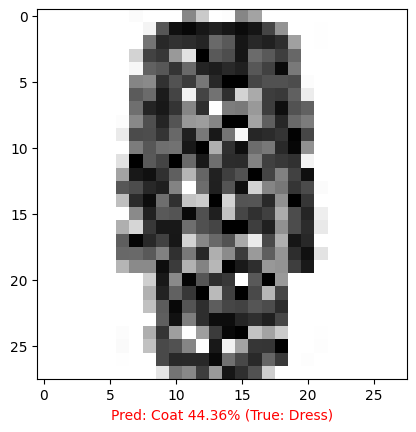

In [103]:
# Check out a random image as well as its prediciton
plot_random_image(model=model_14,
                  images=test_data_norm, # always make predictions on the same kind of data your model was traind on
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [104]:
# Find the layers of our most recent model
model_14.layers

In [105]:
# Extract a particular layer
model_14.layers[0]

In [106]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.2618684 , -0.33718002, -0.34503156, -0.28024766],
        [-0.34413514,  0.55702084, -0.12582274, -0.36377877],
        [ 0.05919719, -0.50913256, -0.40685713, -0.45015097],
        ...,
        [ 0.04055182,  0.7723174 , -0.30163714, -0.24351215],
        [-0.3506886 ,  0.90218383, -0.11849802, -0.00834782],
        [-0.08945333, -0.30576718, -0.40846065, -0.42712274]],
       dtype=float32),
 (784, 4))

In [107]:
28 * 28

784

In [108]:
model_14.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 4)                 3140      
                                                                 
 dense_39 (Dense)            (None, 4)                 20        
                                                                 
 dense_40 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now let's check out the bias vector...

In [109]:
# Bias and biases shapes
biases, biases.shape

(array([ 1.9783489 , -1.0382637 , -0.51791316, -0.800956  ], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get intialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [110]:
model_14.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 4)                 3140      
                                                                 
 dense_39 (Dense)            (None, 4)                 20        
                                                                 
 dense_40 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


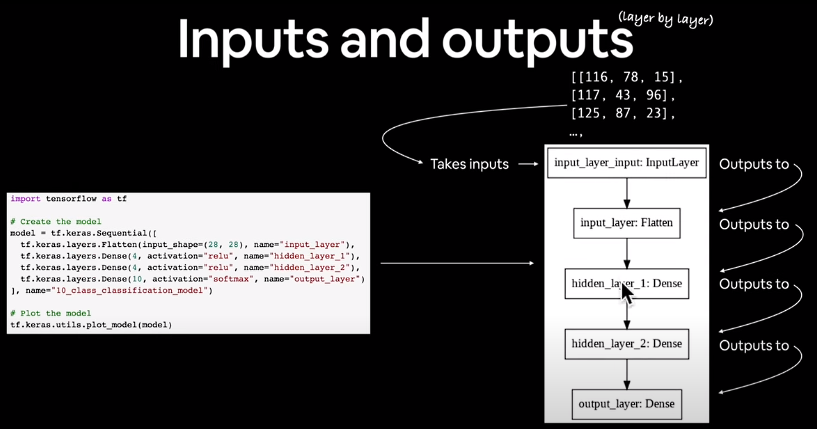

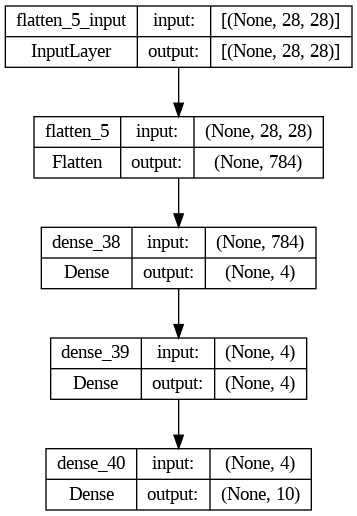

In [111]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

# Next: check out exercises and extra curriculum...